# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploring

In [2]:
df = pd.read_csv('/kaggle/input/insurance-csv/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
columns= df.columns
for col in columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 70)

Unique values in column 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
----------------------------------------------------------------------
Unique values in column 'sex':
['female' 'male']
----------------------------------------------------------------------
Unique values in column 'bmi':
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

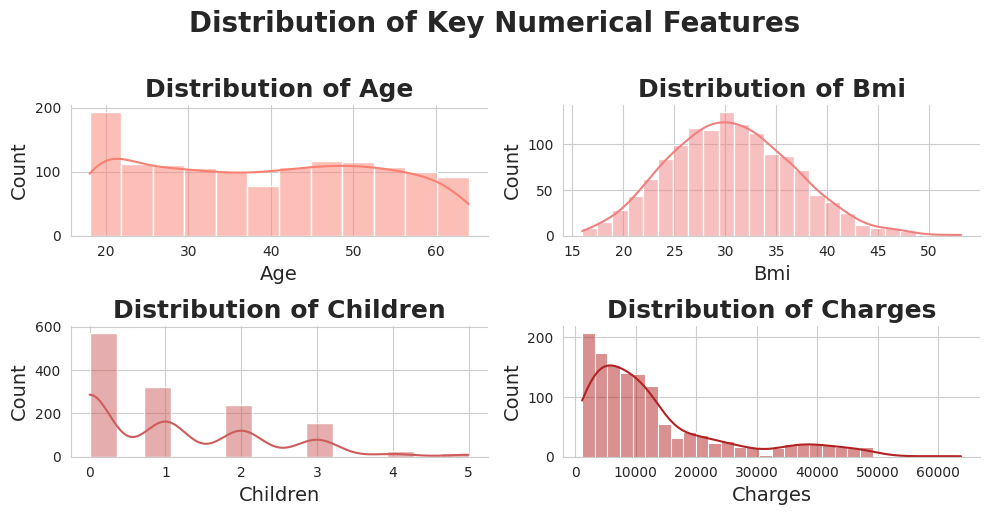

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

# A list of different shades of red
colors = ['salmon', 'lightcoral', 'indianred', 'firebrick']

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col.capitalize()}', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(col.capitalize(), fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    # Remove spines for a cleaner look
    sns.despine(ax=axes[i])

plt.suptitle('Distribution of Key Numerical Features', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

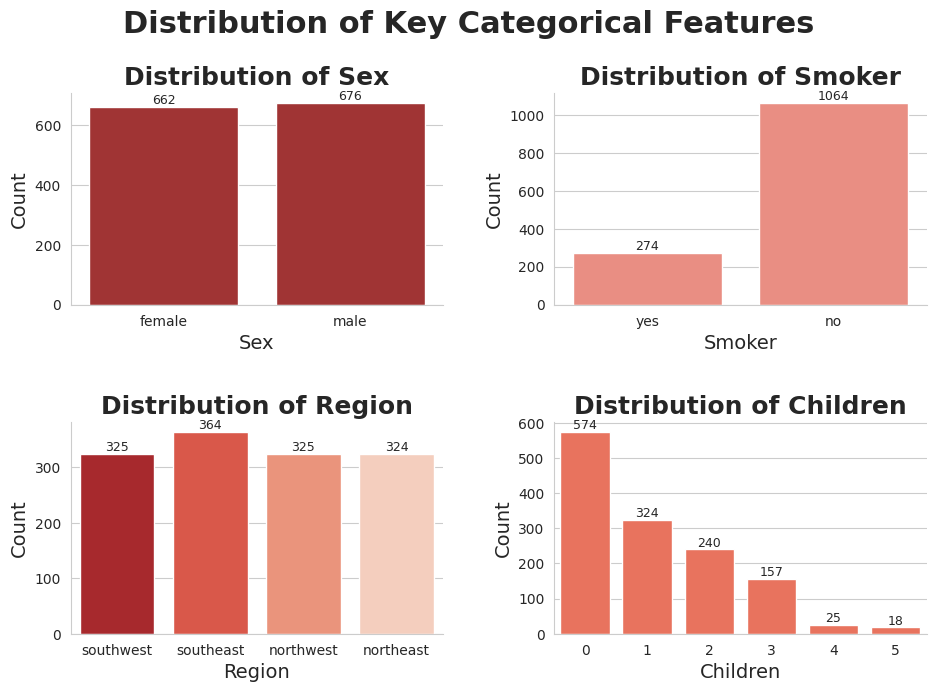

In [8]:
sns.set_style('whitegrid')

categorical_cols = ['sex', 'smoker', 'region', 'children']

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.flatten()

colors = ['firebrick', 'salmon', 'indianred', 'tomato']

for i, col in enumerate(categorical_cols):
    if col == 'region':
        ax = sns.countplot(x=col, data=df, ax=axes[i], palette='Reds_r')
    else:
        ax = sns.countplot(x=col, data=df, ax=axes[i], color=colors[i])
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=9)
    
    axes[i].set_title(f'Distribution of {col.capitalize()}', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(col.capitalize(), fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    
    sns.despine(ax=axes[i])

plt.tight_layout(pad=3.0)
plt.suptitle('Distribution of Key Categorical Features', fontsize=22, fontweight='bold', y=1.02)
plt.show()

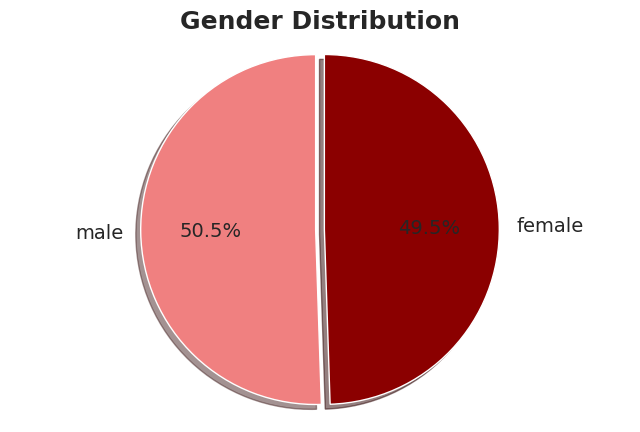

In [9]:
gender_counts = df['sex'].value_counts()
labels = gender_counts.index

colors = ['lightcoral', 'darkred']

explode = (0.05, 0)

plt.figure(figsize=(8, 5))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')  
plt.show()

In [10]:
df.groupby('sex')[['age']].mean()

,age
sex,
female,39.503021
male,38.917160


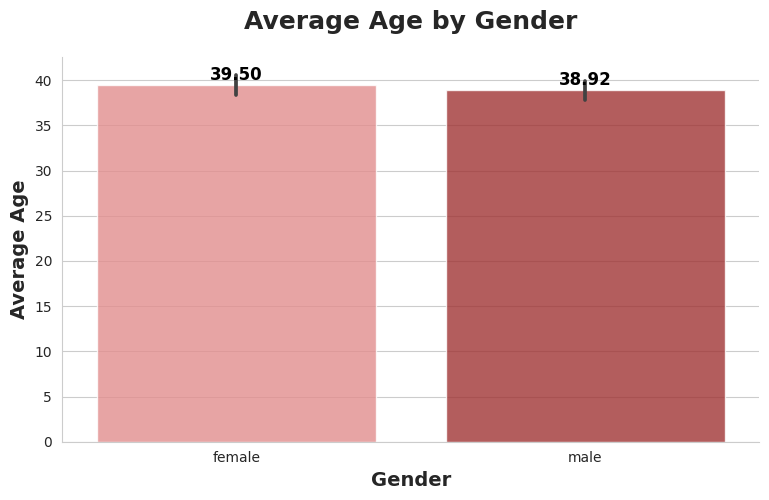

In [11]:
sns.set_style('whitegrid')

red_palette = {'male': 'firebrick', 'female': 'lightcoral'}

plt.figure(figsize=(9, 5))
ax = sns.barplot(x='sex', y='age', data=df, palette=red_palette, alpha=0.8)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                textcoords='offset points', fontweight='bold')

plt.title('Average Age by Gender', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Average Age', fontsize=14, fontweight='bold')

sns.despine()


In [12]:
df.groupby(['sex','smoker'])[['age']].mean()

age
sex    smoker           
female no      39.691042
       yes     38.608696
male   no      39.061896
       yes     38.446541

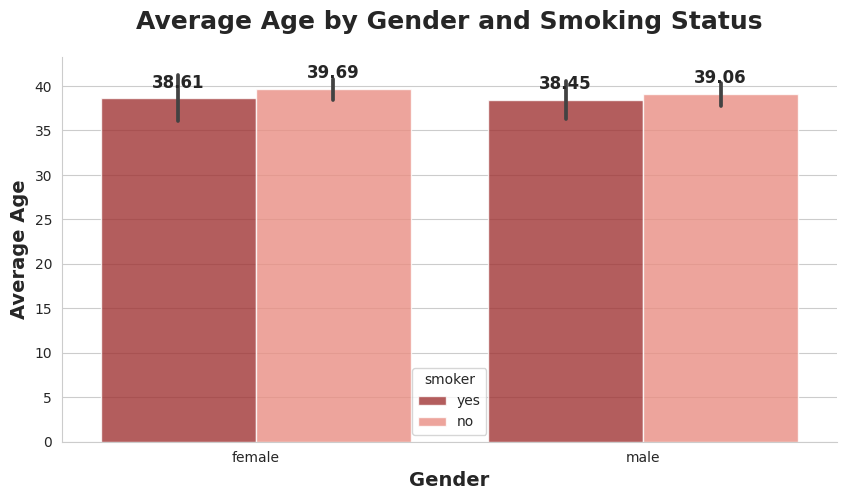

In [13]:
sns.set_style('whitegrid')

red_palette = {'yes': 'firebrick', 'no': 'salmon'}

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='sex', y='age', hue='smoker', data=df, palette=red_palette, alpha=0.8)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=12, fontweight='bold', padding=5)

plt.title('Average Age by Gender and Smoking Status', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Average Age', fontsize=14, fontweight='bold')

sns.despine()

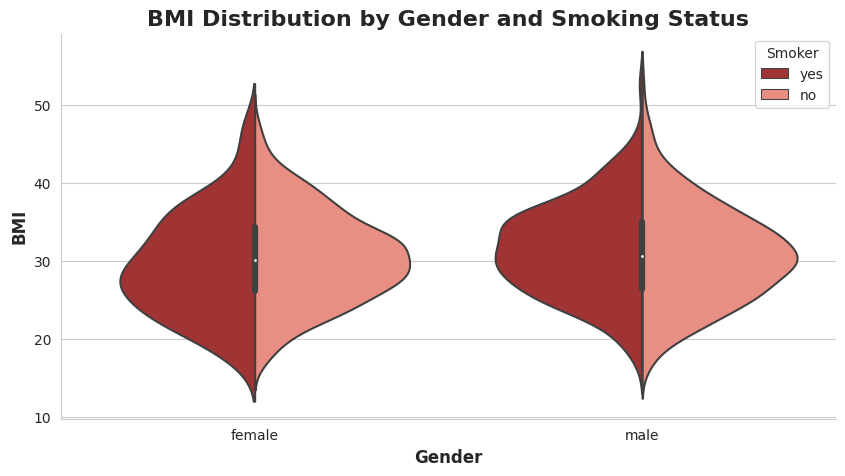

In [14]:
sns.set_style('whitegrid')

# Create the violin plot with a custom red palette
plt.figure(figsize=(10, 5))
sns.violinplot(x='sex', y='bmi', hue='smoker', data=df, split=True, palette=['firebrick', 'salmon'])

# Set titles and labels with improved formatting
plt.title('BMI Distribution by Gender and Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('BMI', fontsize=12, fontweight='bold')

# Ensure the legend is clear
plt.legend(title='Smoker')

# Remove the top and right spines
sns.despine()

plt.show()

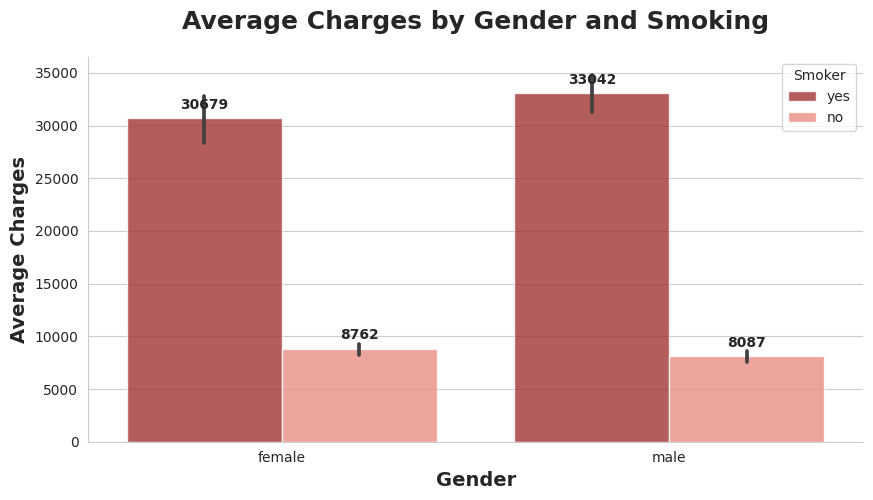

In [15]:
sns.set_style('whitegrid')

red_palette = {'yes': 'firebrick', 'no': 'salmon'}

plt.figure(figsize=(10, 5))
ax_bar = sns.barplot(x='sex', y='charges', hue='smoker', data=df, palette=red_palette, alpha=0.8)

for container in ax_bar.containers:
    ax_bar.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold', padding=5)

plt.title('Average Charges by Gender and Smoking', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Average Charges', fontsize=14, fontweight='bold')
plt.legend(title='Smoker')
sns.despine()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

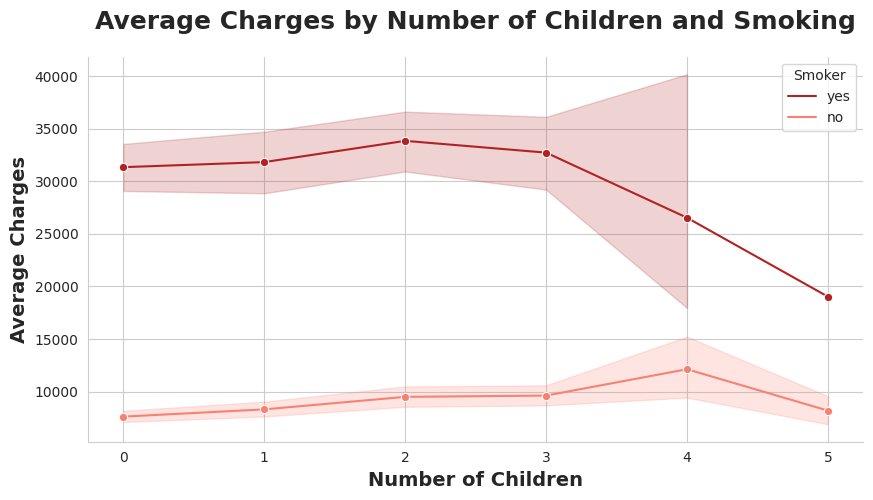

In [16]:
sns.set_style('whitegrid')

# Define a custom red color palette for the smoker categories
red_palette = {'yes': 'firebrick', 'no': 'salmon'}
plt.figure(figsize=(10, 5))
ax_line = sns.lineplot(x='children', y='charges', hue='smoker', data=df, marker='o', palette=red_palette)

plt.title('Average Charges by Number of Children and Smoking', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Children', fontsize=14, fontweight='bold')
plt.ylabel('Average Charges', fontsize=14, fontweight='bold')
plt.legend(title='Smoker')
sns.despine()
plt.show()

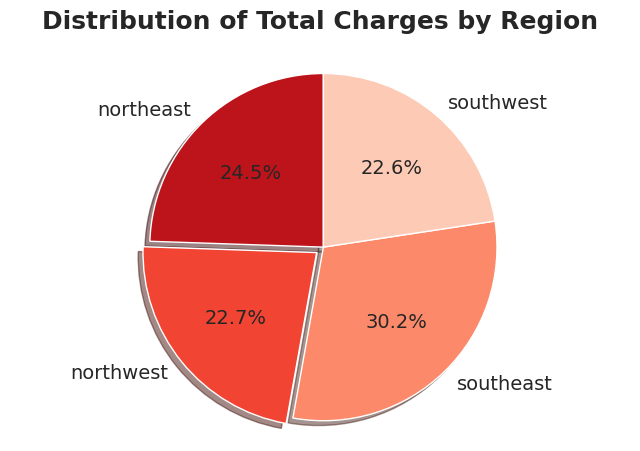

In [17]:
region_charges = df.groupby('region')['charges'].sum()

colors = sns.color_palette('Reds_r', len(region_charges))

explode = (0, 0.05, 0, 0)

plt.figure(figsize=(8, 5))
plt.pie(region_charges, labels=region_charges.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})
plt.title('Distribution of Total Charges by Region', fontsize=18, fontweight='bold', pad=20)
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()

# Data Preprocessing

## Feature Engineering

In [18]:
df['bmi classification']=np.nan
for i in range(df.shape[0]):
    if df['bmi'][i]<18:
        df['bmi classification'][i]= 'underweight'
    elif df['bmi'][i] > 18 and df['bmi'][i] < 24 :
        df['bmi classification'][i]= 'healthy weight'
    elif df['bmi'][i] > 25 and df['bmi'][i] < 29 :
        df['bmi classification'][i]= 'overweight but not obese'
    else:
        df['bmi classification'][i]='obese'

df

/tmp/ipykernel_17/1452821248.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['bmi classification'][i]= 'overweight but not obese'
/tmp/ipykernel_17/1452821248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,age,sex,bmi,children,smoker,region,charges,bmi classification
0,19,female,27.900,0,yes,southwest,16884.92400,overweight but not obese
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight but not obese
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight but not obese


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1338 non-null   int64  
 1   sex                 1338 non-null   object 
 2   bmi                 1338 non-null   float64
 3   children            1338 non-null   int64  
 4   smoker              1338 non-null   object 
 5   region              1338 non-null   object 
 6   charges             1338 non-null   float64
 7   bmi classification  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


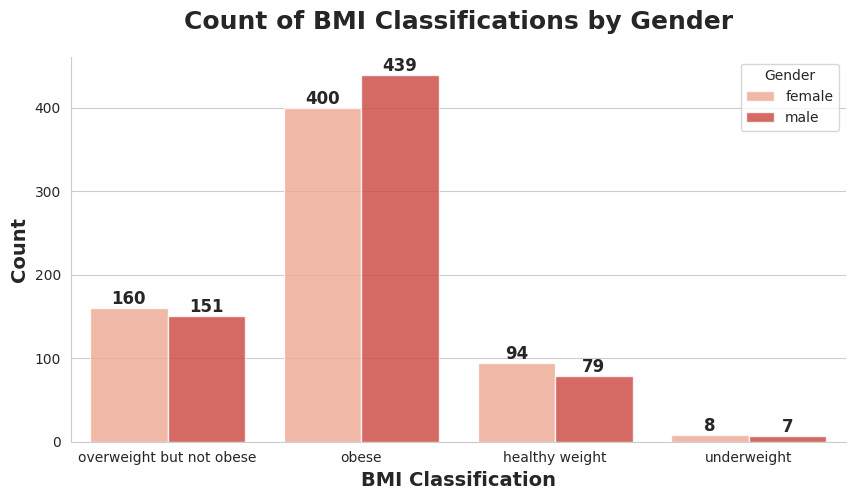

In [20]:
sns.set_style('whitegrid')

# Define a professional color palette
palette = 'Reds'

# Create the countplot with improved styling
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='bmi classification', hue='sex', data=df, palette=palette,alpha=0.8)

# Add numerical labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')

plt.title('Count of BMI Classifications by Gender', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('BMI Classification', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
sns.despine()

plt.show()

In [21]:
df.groupby('smoker')[['charges']].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [22]:
"""df['insurance']=np.nan
for i in range(df.shape[0]):
    if df['smoker'][i] == 'yes':
        df['insurance'][i] = 'high charges'
    else:
        df['insurance'][i] = 'low charges'
df"""

"df['insurance']=np.nan\nfor i in range(df.shape[0]):\n    if df['smoker'][i] == 'yes':\n        df['insurance'][i] = 'high charges'\n    else:\n        df['insurance'][i] = 'low charges'\ndf"

In [23]:
#df.groupby(['smoker', 'insurance'])[['charges']].mean()

## Find Null Values

In [24]:
df.isna().sum()

age                   0
sex                   0
bmi                   0
children              0
smoker                0
region                0
charges               0
bmi classification    0
dtype: int64

## Find Duplicates

In [25]:
df.duplicated().sum()

1

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0